In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


data = pd.read_csv('train_merged.csv', sep=',', header='infer', 
                    dtype={'Store':str, 'Dept':str, 'IsHoliday':str})

Y = data['Weekly_Sales']
del data['Weekly_Sales']
del data['MarkDown1']
del data['MarkDown2']
del data['MarkDown3']
del data['MarkDown4']
del data['MarkDown5']
del data['Date']
del data['Store']
del data['Type']
del data['Size']

X = pd.get_dummies(data)
X = X.values
Y = Y.values
X = X.astype('float32')
Y = Y.astype('float32')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=13)

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import h5py


EPOCHS = 10000

model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(lr=0.001, decay=1e-12), loss='mean_absolute_error')
history = model.fit(X, Y, epochs=EPOCHS, batch_size=X_train.shape[0], verbose=0)

Epoch 1/10000
 - 1s - loss: 21690.1732
Epoch 2/10000
 - 0s - loss: 21687.2714
Epoch 3/10000
 - 0s - loss: 21683.9335
Epoch 4/10000
 - 0s - loss: 21680.4341
Epoch 5/10000
 - 0s - loss: 21676.8430
Epoch 6/10000
 - 0s - loss: 21673.1903
Epoch 7/10000
 - 0s - loss: 21669.4809
Epoch 8/10000
 - 0s - loss: 21665.7305
Epoch 9/10000
 - 0s - loss: 21661.9403
Epoch 10/10000
 - 0s - loss: 21658.1217
Epoch 11/10000
 - 0s - loss: 21654.2717
Epoch 12/10000
 - 0s - loss: 21650.4185
Epoch 13/10000
 - 0s - loss: 21646.5485
Epoch 14/10000
 - 0s - loss: 21642.6613
Epoch 15/10000
 - 0s - loss: 21638.7480
Epoch 16/10000
 - 0s - loss: 21634.8005
Epoch 17/10000
 - 0s - loss: 21630.8082
Epoch 18/10000
 - 0s - loss: 21626.7844
Epoch 19/10000
 - 0s - loss: 21622.7099
Epoch 20/10000
 - 0s - loss: 21618.5893
Epoch 21/10000
 - 0s - loss: 21614.4104
Epoch 22/10000
 - 0s - loss: 21610.1860
Epoch 23/10000
 - 0s - loss: 21605.9026
Epoch 24/10000
 - 0s - loss: 21601.5617
Epoch 25/10000
 - 0s - loss: 21597.1555
Epoch 26/

Epoch 204/10000
 - 0s - loss: 19839.2453
Epoch 205/10000
 - 0s - loss: 19826.4725
Epoch 206/10000
 - 0s - loss: 19813.8074
Epoch 207/10000
 - 0s - loss: 19801.1063
Epoch 208/10000
 - 0s - loss: 19788.4706
Epoch 209/10000
 - 0s - loss: 19775.8005
Epoch 210/10000
 - 0s - loss: 19763.2355
Epoch 211/10000
 - 0s - loss: 19750.6720
Epoch 212/10000
 - 0s - loss: 19738.1011
Epoch 213/10000
 - 0s - loss: 19725.6202
Epoch 214/10000
 - 0s - loss: 19713.1151
Epoch 215/10000
 - 0s - loss: 19700.6495
Epoch 216/10000
 - 0s - loss: 19688.2313
Epoch 217/10000
 - 0s - loss: 19675.8373
Epoch 218/10000
 - 0s - loss: 19663.4953
Epoch 219/10000
 - 0s - loss: 19651.2437
Epoch 220/10000
 - 0s - loss: 19639.0283
Epoch 221/10000
 - 0s - loss: 19626.8604
Epoch 222/10000
 - 0s - loss: 19614.7502
Epoch 223/10000
 - 0s - loss: 19602.7042
Epoch 224/10000
 - 0s - loss: 19590.6456
Epoch 225/10000
 - 0s - loss: 19578.7080
Epoch 226/10000
 - 0s - loss: 19566.7204
Epoch 227/10000
 - 0s - loss: 19554.7951
Epoch 228/10000


Epoch 404/10000
 - 0s - loss: 18131.1664
Epoch 405/10000
 - 0s - loss: 18126.5123
Epoch 406/10000
 - 0s - loss: 18121.8892
Epoch 407/10000
 - 0s - loss: 18117.2040
Epoch 408/10000
 - 0s - loss: 18112.6134
Epoch 409/10000
 - 0s - loss: 18108.0316
Epoch 410/10000
 - 0s - loss: 18103.4700
Epoch 411/10000
 - 0s - loss: 18098.8981
Epoch 412/10000
 - 0s - loss: 18094.4274
Epoch 413/10000
 - 0s - loss: 18089.9918
Epoch 414/10000
 - 0s - loss: 18085.5296
Epoch 415/10000
 - 0s - loss: 18081.1204
Epoch 416/10000
 - 0s - loss: 18076.7084
Epoch 417/10000
 - 0s - loss: 18072.2789
Epoch 418/10000
 - 0s - loss: 18067.9422
Epoch 419/10000
 - 0s - loss: 18063.6546
Epoch 420/10000
 - 0s - loss: 18059.3041
Epoch 421/10000
 - 0s - loss: 18055.1698
Epoch 422/10000
 - 0s - loss: 18050.9529
Epoch 423/10000
 - 0s - loss: 18046.8180
Epoch 424/10000
 - 0s - loss: 18042.7419
Epoch 425/10000
 - 0s - loss: 18038.6552
Epoch 426/10000
 - 0s - loss: 18034.6149
Epoch 427/10000
 - 0s - loss: 18030.5564
Epoch 428/10000


Epoch 604/10000
 - 0s - loss: 17721.5875
Epoch 605/10000
 - 0s - loss: 17721.0738
Epoch 606/10000
 - 0s - loss: 17720.5637
Epoch 607/10000
 - 0s - loss: 17720.0772
Epoch 608/10000
 - 0s - loss: 17719.5692
Epoch 609/10000
 - 0s - loss: 17719.1074
Epoch 610/10000
 - 0s - loss: 17718.6402
Epoch 611/10000
 - 0s - loss: 17718.1841
Epoch 612/10000
 - 0s - loss: 17717.7344
Epoch 613/10000
 - 0s - loss: 17717.3033
Epoch 614/10000
 - 0s - loss: 17716.8586
Epoch 615/10000
 - 0s - loss: 17716.4237
Epoch 616/10000
 - 0s - loss: 17715.9731
Epoch 617/10000
 - 0s - loss: 17715.5624
Epoch 618/10000
 - 0s - loss: 17715.1555
Epoch 619/10000
 - 0s - loss: 17714.7699
Epoch 620/10000
 - 0s - loss: 17714.3896
Epoch 621/10000
 - 0s - loss: 17714.0185
Epoch 622/10000
 - 0s - loss: 17713.6287
Epoch 623/10000
 - 0s - loss: 17713.2584
Epoch 624/10000
 - 0s - loss: 17712.8895
Epoch 625/10000
 - 0s - loss: 17712.5080
Epoch 626/10000
 - 0s - loss: 17712.1628
Epoch 627/10000
 - 0s - loss: 17711.8201
Epoch 628/10000


Epoch 804/10000
 - 0s - loss: 17688.8528
Epoch 805/10000
 - 0s - loss: 17688.7922
Epoch 806/10000
 - 0s - loss: 17688.7285
Epoch 807/10000
 - 0s - loss: 17688.6658
Epoch 808/10000
 - 0s - loss: 17688.6069
Epoch 809/10000
 - 0s - loss: 17688.5479
Epoch 810/10000
 - 0s - loss: 17688.4889
Epoch 811/10000
 - 0s - loss: 17688.4342
Epoch 812/10000
 - 0s - loss: 17688.3762
Epoch 813/10000
 - 0s - loss: 17688.3199
Epoch 814/10000
 - 0s - loss: 17688.2624
Epoch 815/10000
 - 0s - loss: 17688.2039
Epoch 816/10000
 - 0s - loss: 17688.1441
Epoch 817/10000
 - 0s - loss: 17688.0844
Epoch 818/10000
 - 0s - loss: 17688.0218
Epoch 819/10000
 - 0s - loss: 17687.9548
Epoch 820/10000
 - 0s - loss: 17687.8928
Epoch 821/10000
 - 0s - loss: 17687.8305
Epoch 822/10000
 - 0s - loss: 17687.7566
Epoch 823/10000
 - 0s - loss: 17687.6888
Epoch 824/10000
 - 0s - loss: 17687.6111
Epoch 825/10000
 - 0s - loss: 17687.5457
Epoch 826/10000
 - 0s - loss: 17687.4650
Epoch 827/10000
 - 0s - loss: 17687.3947
Epoch 828/10000


Epoch 1004/10000
 - 0s - loss: 17677.0893
Epoch 1005/10000
 - 0s - loss: 17677.0296
Epoch 1006/10000
 - 0s - loss: 17676.9736
Epoch 1007/10000
 - 0s - loss: 17676.9194
Epoch 1008/10000
 - 0s - loss: 17676.8654
Epoch 1009/10000
 - 0s - loss: 17676.8074
Epoch 1010/10000
 - 0s - loss: 17676.7533
Epoch 1011/10000
 - 0s - loss: 17676.6949
Epoch 1012/10000
 - 0s - loss: 17676.6426
Epoch 1013/10000
 - 0s - loss: 17676.5850
Epoch 1014/10000
 - 0s - loss: 17676.5311
Epoch 1015/10000
 - 0s - loss: 17676.4750
Epoch 1016/10000
 - 0s - loss: 17676.4186
Epoch 1017/10000
 - 0s - loss: 17676.3676
Epoch 1018/10000
 - 0s - loss: 17676.3100
Epoch 1019/10000
 - 0s - loss: 17676.2549
Epoch 1020/10000
 - 0s - loss: 17676.2005
Epoch 1021/10000
 - 0s - loss: 17676.1437
Epoch 1022/10000
 - 0s - loss: 17676.0905
Epoch 1023/10000
 - 0s - loss: 17676.0371
Epoch 1024/10000
 - 0s - loss: 17675.9807
Epoch 1025/10000
 - 0s - loss: 17675.9250
Epoch 1026/10000
 - 0s - loss: 17675.8696
Epoch 1027/10000
 - 0s - loss: 176

 - 0s - loss: 17666.2333
Epoch 1200/10000
 - 0s - loss: 17666.1820
Epoch 1201/10000
 - 0s - loss: 17666.1221
Epoch 1202/10000
 - 0s - loss: 17666.0667
Epoch 1203/10000
 - 0s - loss: 17666.0097
Epoch 1204/10000
 - 0s - loss: 17665.9544
Epoch 1205/10000
 - 0s - loss: 17665.8958
Epoch 1206/10000
 - 0s - loss: 17665.8457
Epoch 1207/10000
 - 0s - loss: 17665.7870
Epoch 1208/10000
 - 0s - loss: 17665.7308
Epoch 1209/10000
 - 0s - loss: 17665.6813
Epoch 1210/10000
 - 0s - loss: 17665.6203
Epoch 1211/10000
 - 0s - loss: 17665.5659
Epoch 1212/10000
 - 0s - loss: 17665.5101
Epoch 1213/10000
 - 0s - loss: 17665.4535
Epoch 1214/10000
 - 0s - loss: 17665.4015
Epoch 1215/10000
 - 0s - loss: 17665.3451
Epoch 1216/10000
 - 0s - loss: 17665.2919
Epoch 1217/10000
 - 0s - loss: 17665.2376
Epoch 1218/10000
 - 0s - loss: 17665.1858
Epoch 1219/10000
 - 0s - loss: 17665.1352
Epoch 1220/10000
 - 0s - loss: 17665.0794
Epoch 1221/10000
 - 0s - loss: 17665.0254
Epoch 1222/10000
 - 0s - loss: 17664.9709
Epoch 122

Epoch 1395/10000
 - 0s - loss: 17655.1002
Epoch 1396/10000
 - 0s - loss: 17655.0425
Epoch 1397/10000
 - 0s - loss: 17654.9876
Epoch 1398/10000
 - 0s - loss: 17654.9233
Epoch 1399/10000
 - 0s - loss: 17654.8661
Epoch 1400/10000
 - 0s - loss: 17654.8119
Epoch 1401/10000
 - 0s - loss: 17654.7485
Epoch 1402/10000
 - 0s - loss: 17654.6992
Epoch 1403/10000
 - 0s - loss: 17654.6394
Epoch 1404/10000
 - 0s - loss: 17654.5793
Epoch 1405/10000
 - 0s - loss: 17654.5216
Epoch 1406/10000
 - 0s - loss: 17654.4645
Epoch 1407/10000
 - 0s - loss: 17654.4086
Epoch 1408/10000
 - 0s - loss: 17654.3496
Epoch 1409/10000
 - 0s - loss: 17654.2898
Epoch 1410/10000
 - 0s - loss: 17654.2325
Epoch 1411/10000
 - 0s - loss: 17654.1709
Epoch 1412/10000
 - 0s - loss: 17654.1141
Epoch 1413/10000
 - 0s - loss: 17654.0586
Epoch 1414/10000
 - 0s - loss: 17653.9976
Epoch 1415/10000
 - 0s - loss: 17653.9384
Epoch 1416/10000
 - 0s - loss: 17653.8830
Epoch 1417/10000
 - 0s - loss: 17653.8234
Epoch 1418/10000
 - 0s - loss: 176

 - 0s - loss: 17643.3763
Epoch 1591/10000
 - 0s - loss: 17643.3173
Epoch 1592/10000
 - 0s - loss: 17643.2536
Epoch 1593/10000
 - 0s - loss: 17643.1897
Epoch 1594/10000
 - 0s - loss: 17643.1260
Epoch 1595/10000
 - 0s - loss: 17643.0537
Epoch 1596/10000
 - 0s - loss: 17642.9873
Epoch 1597/10000
 - 0s - loss: 17642.9203
Epoch 1598/10000
 - 0s - loss: 17642.8512
Epoch 1599/10000
 - 0s - loss: 17642.7897
Epoch 1600/10000
 - 0s - loss: 17642.7301
Epoch 1601/10000
 - 0s - loss: 17642.6620
Epoch 1602/10000
 - 0s - loss: 17642.5968
Epoch 1603/10000
 - 0s - loss: 17642.5404
Epoch 1604/10000
 - 0s - loss: 17642.4793
Epoch 1605/10000
 - 0s - loss: 17642.4266
Epoch 1606/10000
 - 0s - loss: 17642.3560
Epoch 1607/10000
 - 0s - loss: 17642.2925
Epoch 1608/10000
 - 0s - loss: 17642.2274
Epoch 1609/10000
 - 0s - loss: 17642.1605
Epoch 1610/10000
 - 0s - loss: 17642.0958
Epoch 1611/10000
 - 0s - loss: 17642.0316
Epoch 1612/10000
 - 0s - loss: 17641.9707
Epoch 1613/10000
 - 0s - loss: 17641.9016
Epoch 161

Epoch 1786/10000
 - 0s - loss: 17630.2495
Epoch 1787/10000
 - 0s - loss: 17630.1807
Epoch 1788/10000
 - 0s - loss: 17630.1240
Epoch 1789/10000
 - 0s - loss: 17630.0427
Epoch 1790/10000
 - 0s - loss: 17629.9527
Epoch 1791/10000
 - 0s - loss: 17629.8702
Epoch 1792/10000
 - 0s - loss: 17629.7886
Epoch 1793/10000
 - 0s - loss: 17629.7027
Epoch 1794/10000
 - 0s - loss: 17629.6114
Epoch 1795/10000
 - 0s - loss: 17629.5276
Epoch 1796/10000
 - 0s - loss: 17629.4233
Epoch 1797/10000
 - 0s - loss: 17629.3285
Epoch 1798/10000
 - 0s - loss: 17629.2435
Epoch 1799/10000
 - 0s - loss: 17629.1427
Epoch 1800/10000
 - 0s - loss: 17629.0592
Epoch 1801/10000
 - 0s - loss: 17628.9720
Epoch 1802/10000
 - 0s - loss: 17628.8929
Epoch 1803/10000
 - 0s - loss: 17628.8151
Epoch 1804/10000
 - 0s - loss: 17628.7493
Epoch 1805/10000
 - 0s - loss: 17628.6809
Epoch 1806/10000
 - 0s - loss: 17628.6250
Epoch 1807/10000
 - 0s - loss: 17628.5575
Epoch 1808/10000
 - 0s - loss: 17628.5003
Epoch 1809/10000
 - 0s - loss: 176

 - 0s - loss: 17612.3507
Epoch 1982/10000
 - 0s - loss: 17612.2602
Epoch 1983/10000
 - 0s - loss: 17612.1569
Epoch 1984/10000
 - 0s - loss: 17612.0490
Epoch 1985/10000
 - 0s - loss: 17611.9474
Epoch 1986/10000
 - 0s - loss: 17611.8428
Epoch 1987/10000
 - 0s - loss: 17611.7401
Epoch 1988/10000
 - 0s - loss: 17611.6340
Epoch 1989/10000
 - 0s - loss: 17611.5386
Epoch 1990/10000
 - 0s - loss: 17611.4213
Epoch 1991/10000
 - 0s - loss: 17611.3182
Epoch 1992/10000
 - 0s - loss: 17611.2022
Epoch 1993/10000
 - 0s - loss: 17611.0901
Epoch 1994/10000
 - 0s - loss: 17610.9828
Epoch 1995/10000
 - 0s - loss: 17610.8714
Epoch 1996/10000
 - 0s - loss: 17610.7604
Epoch 1997/10000
 - 0s - loss: 17610.6524
Epoch 1998/10000
 - 0s - loss: 17610.5448
Epoch 1999/10000
 - 0s - loss: 17610.4320
Epoch 2000/10000
 - 0s - loss: 17610.3182
Epoch 2001/10000
 - 0s - loss: 17610.2199
Epoch 2002/10000
 - 0s - loss: 17610.1058
Epoch 2003/10000
 - 0s - loss: 17609.9943
Epoch 2004/10000
 - 0s - loss: 17609.8884
Epoch 200

Epoch 2177/10000
 - 0s - loss: 17588.5287
Epoch 2178/10000
 - 0s - loss: 17588.3934
Epoch 2179/10000
 - 0s - loss: 17588.2591
Epoch 2180/10000
 - 0s - loss: 17588.1178
Epoch 2181/10000
 - 0s - loss: 17587.9946
Epoch 2182/10000
 - 0s - loss: 17587.8464
Epoch 2183/10000
 - 0s - loss: 17587.7048
Epoch 2184/10000
 - 0s - loss: 17587.5650
Epoch 2185/10000
 - 0s - loss: 17587.4435
Epoch 2186/10000
 - 0s - loss: 17587.2944
Epoch 2187/10000
 - 0s - loss: 17587.1487
Epoch 2188/10000
 - 0s - loss: 17587.0321
Epoch 2189/10000
 - 0s - loss: 17586.9278
Epoch 2190/10000
 - 0s - loss: 17586.7843
Epoch 2191/10000
 - 0s - loss: 17586.6738
Epoch 2192/10000
 - 0s - loss: 17586.5352
Epoch 2193/10000
 - 0s - loss: 17586.4077
Epoch 2194/10000
 - 0s - loss: 17586.2767
Epoch 2195/10000
 - 0s - loss: 17586.1389
Epoch 2196/10000
 - 0s - loss: 17586.0006
Epoch 2197/10000
 - 0s - loss: 17585.8599
Epoch 2198/10000
 - 0s - loss: 17585.7262
Epoch 2199/10000
 - 0s - loss: 17585.6042
Epoch 2200/10000
 - 0s - loss: 175

 - 0s - loss: 17558.3968
Epoch 2373/10000
 - 0s - loss: 17558.1696
Epoch 2374/10000
 - 0s - loss: 17557.9875
Epoch 2375/10000
 - 0s - loss: 17557.7941
Epoch 2376/10000
 - 0s - loss: 17557.6101
Epoch 2377/10000
 - 0s - loss: 17557.4269
Epoch 2378/10000
 - 0s - loss: 17557.2490
Epoch 2379/10000
 - 0s - loss: 17557.0785
Epoch 2380/10000
 - 0s - loss: 17556.8944
Epoch 2381/10000
 - 0s - loss: 17556.7155
Epoch 2382/10000
 - 0s - loss: 17556.5387
Epoch 2383/10000
 - 0s - loss: 17556.3852
Epoch 2384/10000
 - 0s - loss: 17556.1820
Epoch 2385/10000
 - 0s - loss: 17556.0063
Epoch 2386/10000
 - 0s - loss: 17555.8366
Epoch 2387/10000
 - 0s - loss: 17555.6478
Epoch 2388/10000
 - 0s - loss: 17555.4719
Epoch 2389/10000
 - 0s - loss: 17555.2909
Epoch 2390/10000
 - 0s - loss: 17555.1086
Epoch 2391/10000
 - 0s - loss: 17554.9376
Epoch 2392/10000
 - 0s - loss: 17554.7494
Epoch 2393/10000
 - 0s - loss: 17554.5700
Epoch 2394/10000
 - 0s - loss: 17554.3948
Epoch 2395/10000
 - 0s - loss: 17554.2151
Epoch 239

Epoch 2568/10000
 - 0s - loss: 17520.6101
Epoch 2569/10000
 - 0s - loss: 17520.3928
Epoch 2570/10000
 - 0s - loss: 17520.1816
Epoch 2571/10000
 - 0s - loss: 17519.9630
Epoch 2572/10000
 - 0s - loss: 17519.7520
Epoch 2573/10000
 - 0s - loss: 17519.5446
Epoch 2574/10000
 - 0s - loss: 17519.3377
Epoch 2575/10000
 - 0s - loss: 17519.1199
Epoch 2576/10000
 - 0s - loss: 17518.9012
Epoch 2577/10000
 - 0s - loss: 17518.7053
Epoch 2578/10000
 - 0s - loss: 17518.4964
Epoch 2579/10000
 - 0s - loss: 17518.2860
Epoch 2580/10000
 - 0s - loss: 17518.0758
Epoch 2581/10000
 - 0s - loss: 17517.8759
Epoch 2582/10000
 - 0s - loss: 17517.6483
Epoch 2583/10000
 - 0s - loss: 17517.4417
Epoch 2584/10000
 - 0s - loss: 17517.2458
Epoch 2585/10000
 - 0s - loss: 17517.0310
Epoch 2586/10000
 - 0s - loss: 17516.8282
Epoch 2587/10000
 - 0s - loss: 17516.6198
Epoch 2588/10000
 - 0s - loss: 17516.4169
Epoch 2589/10000
 - 0s - loss: 17516.2073
Epoch 2590/10000
 - 0s - loss: 17516.0008
Epoch 2591/10000
 - 0s - loss: 175

 - 0s - loss: 17477.4041
Epoch 2764/10000
 - 0s - loss: 17477.1661
Epoch 2765/10000
 - 0s - loss: 17476.9263
Epoch 2766/10000
 - 0s - loss: 17476.7127
Epoch 2767/10000
 - 0s - loss: 17476.5045
Epoch 2768/10000
 - 0s - loss: 17476.2776
Epoch 2769/10000
 - 0s - loss: 17476.0502
Epoch 2770/10000
 - 0s - loss: 17475.8199
Epoch 2771/10000
 - 0s - loss: 17475.5691
Epoch 2772/10000
 - 0s - loss: 17475.3416
Epoch 2773/10000
 - 0s - loss: 17475.1070
Epoch 2774/10000
 - 0s - loss: 17474.8712
Epoch 2775/10000
 - 0s - loss: 17474.6395
Epoch 2776/10000
 - 0s - loss: 17474.4049
Epoch 2777/10000
 - 0s - loss: 17474.1968
Epoch 2778/10000
 - 0s - loss: 17473.9285
Epoch 2779/10000
 - 0s - loss: 17473.6658
Epoch 2780/10000
 - 0s - loss: 17473.3993
Epoch 2781/10000
 - 0s - loss: 17473.1214
Epoch 2782/10000
 - 0s - loss: 17472.8713
Epoch 2783/10000
 - 0s - loss: 17472.6279
Epoch 2784/10000
 - 0s - loss: 17472.3807
Epoch 2785/10000
 - 0s - loss: 17472.1396
Epoch 2786/10000
 - 0s - loss: 17471.8964
Epoch 278

Epoch 2959/10000
 - 0s - loss: 17427.5514
Epoch 2960/10000
 - 0s - loss: 17427.2872
Epoch 2961/10000
 - 0s - loss: 17427.0151
Epoch 2962/10000
 - 0s - loss: 17426.7625
Epoch 2963/10000
 - 0s - loss: 17426.5237
Epoch 2964/10000
 - 0s - loss: 17426.2314
Epoch 2965/10000
 - 0s - loss: 17425.9394
Epoch 2966/10000
 - 0s - loss: 17425.6061
Epoch 2967/10000
 - 0s - loss: 17425.3282
Epoch 2968/10000
 - 0s - loss: 17425.0296
Epoch 2969/10000
 - 0s - loss: 17424.7378
Epoch 2970/10000
 - 0s - loss: 17424.4536
Epoch 2971/10000
 - 0s - loss: 17424.1901
Epoch 2972/10000
 - 0s - loss: 17423.8988
Epoch 2973/10000
 - 0s - loss: 17423.6175
Epoch 2974/10000
 - 0s - loss: 17423.3592
Epoch 2975/10000
 - 0s - loss: 17423.1129
Epoch 2976/10000
 - 0s - loss: 17422.8264
Epoch 2977/10000
 - 0s - loss: 17422.5460
Epoch 2978/10000
 - 0s - loss: 17422.2598
Epoch 2979/10000
 - 0s - loss: 17421.9982
Epoch 2980/10000
 - 0s - loss: 17421.7078
Epoch 2981/10000
 - 0s - loss: 17421.4312
Epoch 2982/10000
 - 0s - loss: 174

 - 0s - loss: 17371.3511
Epoch 3155/10000
 - 0s - loss: 17370.9903
Epoch 3156/10000
 - 0s - loss: 17370.6281
Epoch 3157/10000
 - 0s - loss: 17370.2782
Epoch 3158/10000
 - 0s - loss: 17369.9988
Epoch 3159/10000
 - 0s - loss: 17369.7831
Epoch 3160/10000
 - 0s - loss: 17369.4379
Epoch 3161/10000
 - 0s - loss: 17369.1384
Epoch 3162/10000
 - 0s - loss: 17368.8372
Epoch 3163/10000
 - 0s - loss: 17368.5344
Epoch 3164/10000
 - 0s - loss: 17368.2259
Epoch 3165/10000
 - 0s - loss: 17367.9275
Epoch 3166/10000
 - 0s - loss: 17367.6557
Epoch 3167/10000
 - 0s - loss: 17367.3470
Epoch 3168/10000
 - 0s - loss: 17367.0286
Epoch 3169/10000
 - 0s - loss: 17366.6934
Epoch 3170/10000
 - 0s - loss: 17366.3801
Epoch 3171/10000
 - 0s - loss: 17366.0326
Epoch 3172/10000
 - 0s - loss: 17365.7157
Epoch 3173/10000
 - 0s - loss: 17365.3837
Epoch 3174/10000
 - 0s - loss: 17365.1149
Epoch 3175/10000
 - 0s - loss: 17364.7553
Epoch 3176/10000
 - 0s - loss: 17364.4402
Epoch 3177/10000
 - 0s - loss: 17364.1294
Epoch 317

Epoch 3350/10000
 - 0s - loss: 17307.7106
Epoch 3351/10000
 - 0s - loss: 17307.3337
Epoch 3352/10000
 - 0s - loss: 17306.9598
Epoch 3353/10000
 - 0s - loss: 17306.6038
Epoch 3354/10000
 - 0s - loss: 17306.2383
Epoch 3355/10000
 - 0s - loss: 17305.9285
Epoch 3356/10000
 - 0s - loss: 17305.6012
Epoch 3357/10000
 - 0s - loss: 17305.2719
Epoch 3358/10000
 - 0s - loss: 17304.9143
Epoch 3359/10000
 - 0s - loss: 17304.5597
Epoch 3360/10000
 - 0s - loss: 17304.2029
Epoch 3361/10000
 - 0s - loss: 17303.8549
Epoch 3362/10000
 - 0s - loss: 17303.5030
Epoch 3363/10000
 - 0s - loss: 17303.1965
Epoch 3364/10000
 - 0s - loss: 17302.8079
Epoch 3365/10000
 - 0s - loss: 17302.4347
Epoch 3366/10000
 - 0s - loss: 17302.0555
Epoch 3367/10000
 - 0s - loss: 17301.7201
Epoch 3368/10000
 - 0s - loss: 17301.3726
Epoch 3369/10000
 - 0s - loss: 17301.0204
Epoch 3370/10000
 - 0s - loss: 17300.6716
Epoch 3371/10000
 - 0s - loss: 17300.3323
Epoch 3372/10000
 - 0s - loss: 17300.0062
Epoch 3373/10000
 - 0s - loss: 172

 - 0s - loss: 17236.5497
Epoch 3546/10000
 - 0s - loss: 17236.1302
Epoch 3547/10000
 - 0s - loss: 17235.7448
Epoch 3548/10000
 - 0s - loss: 17235.3263
Epoch 3549/10000
 - 0s - loss: 17234.9334
Epoch 3550/10000
 - 0s - loss: 17234.5425
Epoch 3551/10000
 - 0s - loss: 17234.1287
Epoch 3552/10000
 - 0s - loss: 17233.7416
Epoch 3553/10000
 - 0s - loss: 17233.4222
Epoch 3554/10000
 - 0s - loss: 17233.0936
Epoch 3555/10000
 - 0s - loss: 17232.7822
Epoch 3556/10000
 - 0s - loss: 17232.3851
Epoch 3557/10000
 - 0s - loss: 17231.9614
Epoch 3558/10000
 - 0s - loss: 17231.5761
Epoch 3559/10000
 - 0s - loss: 17231.1702
Epoch 3560/10000
 - 0s - loss: 17230.7913
Epoch 3561/10000
 - 0s - loss: 17230.3993
Epoch 3562/10000
 - 0s - loss: 17230.0212
Epoch 3563/10000
 - 0s - loss: 17229.6287
Epoch 3564/10000
 - 0s - loss: 17229.2747
Epoch 3565/10000
 - 0s - loss: 17228.8560
Epoch 3566/10000
 - 0s - loss: 17228.3959
Epoch 3567/10000
 - 0s - loss: 17227.9677
Epoch 3568/10000
 - 0s - loss: 17227.5360
Epoch 356

Epoch 3741/10000
 - 0s - loss: 17156.6583
Epoch 3742/10000
 - 0s - loss: 17156.2242
Epoch 3743/10000
 - 0s - loss: 17155.8038
Epoch 3744/10000
 - 0s - loss: 17155.3331
Epoch 3745/10000
 - 0s - loss: 17154.9106
Epoch 3746/10000
 - 0s - loss: 17154.4820
Epoch 3747/10000
 - 0s - loss: 17154.0352
Epoch 3748/10000
 - 0s - loss: 17153.6999
Epoch 3749/10000
 - 0s - loss: 17153.2637
Epoch 3750/10000
 - 0s - loss: 17152.8375
Epoch 3751/10000
 - 0s - loss: 17152.3827
Epoch 3752/10000
 - 0s - loss: 17151.9184
Epoch 3753/10000
 - 0s - loss: 17151.4395
Epoch 3754/10000
 - 0s - loss: 17150.9926
Epoch 3755/10000
 - 0s - loss: 17150.5246
Epoch 3756/10000
 - 0s - loss: 17150.0946
Epoch 3757/10000
 - 0s - loss: 17149.6587
Epoch 3758/10000
 - 0s - loss: 17149.2235
Epoch 3759/10000
 - 0s - loss: 17148.7878
Epoch 3760/10000
 - 0s - loss: 17148.3401
Epoch 3761/10000
 - 0s - loss: 17147.9287
Epoch 3762/10000
 - 0s - loss: 17147.5832
Epoch 3763/10000
 - 0s - loss: 17147.1775
Epoch 3764/10000
 - 0s - loss: 171

 - 0s - loss: 17068.9239
Epoch 3937/10000
 - 0s - loss: 17068.4553
Epoch 3938/10000
 - 0s - loss: 17067.9831
Epoch 3939/10000
 - 0s - loss: 17067.5463
Epoch 3940/10000
 - 0s - loss: 17067.0626
Epoch 3941/10000
 - 0s - loss: 17066.5836
Epoch 3942/10000
 - 0s - loss: 17066.1022
Epoch 3943/10000
 - 0s - loss: 17065.6183
Epoch 3944/10000
 - 0s - loss: 17065.1870
Epoch 3945/10000
 - 0s - loss: 17064.6756
Epoch 3946/10000
 - 0s - loss: 17064.2386
Epoch 3947/10000
 - 0s - loss: 17063.8656
Epoch 3948/10000
 - 0s - loss: 17063.3432
Epoch 3949/10000
 - 0s - loss: 17062.8609
Epoch 3950/10000
 - 0s - loss: 17062.3823
Epoch 3951/10000
 - 0s - loss: 17061.8938
Epoch 3952/10000
 - 0s - loss: 17061.4419
Epoch 3953/10000
 - 0s - loss: 17061.0197
Epoch 3954/10000
 - 0s - loss: 17060.5601
Epoch 3955/10000
 - 0s - loss: 17060.0832
Epoch 3956/10000
 - 0s - loss: 17059.5920
Epoch 3957/10000
 - 0s - loss: 17059.1207
Epoch 3958/10000
 - 0s - loss: 17058.6706
Epoch 3959/10000
 - 0s - loss: 17058.3192
Epoch 396

Epoch 4132/10000
 - 0s - loss: 16974.4434
Epoch 4133/10000
 - 0s - loss: 16973.9379
Epoch 4134/10000
 - 0s - loss: 16973.3938
Epoch 4135/10000
 - 0s - loss: 16972.8747
Epoch 4136/10000
 - 0s - loss: 16972.3194
Epoch 4137/10000
 - 0s - loss: 16971.8228
Epoch 4138/10000
 - 0s - loss: 16971.2501
Epoch 4139/10000
 - 0s - loss: 16970.7339
Epoch 4140/10000
 - 0s - loss: 16970.2221
Epoch 4141/10000
 - 0s - loss: 16969.7179
Epoch 4142/10000
 - 0s - loss: 16969.2395
Epoch 4143/10000
 - 0s - loss: 16968.7614
Epoch 4144/10000
 - 0s - loss: 16968.2922
Epoch 4145/10000
 - 0s - loss: 16967.7789
Epoch 4146/10000
 - 0s - loss: 16967.2608
Epoch 4147/10000
 - 0s - loss: 16966.6954
Epoch 4148/10000
 - 0s - loss: 16966.1349
Epoch 4149/10000
 - 0s - loss: 16965.7444
Epoch 4150/10000
 - 0s - loss: 16965.2652
Epoch 4151/10000
 - 0s - loss: 16964.7918
Epoch 4152/10000
 - 0s - loss: 16964.3019
Epoch 4153/10000
 - 0s - loss: 16963.8109
Epoch 4154/10000
 - 0s - loss: 16963.3449
Epoch 4155/10000
 - 0s - loss: 169

 - 0s - loss: 16872.5817
Epoch 4328/10000
 - 0s - loss: 16871.9478
Epoch 4329/10000
 - 0s - loss: 16871.3891
Epoch 4330/10000
 - 0s - loss: 16870.7760
Epoch 4331/10000
 - 0s - loss: 16870.2387
Epoch 4332/10000
 - 0s - loss: 16869.6878
Epoch 4333/10000
 - 0s - loss: 16869.0909
Epoch 4334/10000
 - 0s - loss: 16868.5393
Epoch 4335/10000
 - 0s - loss: 16867.9905
Epoch 4336/10000
 - 0s - loss: 16867.4517
Epoch 4337/10000
 - 0s - loss: 16866.9059
Epoch 4338/10000
 - 0s - loss: 16866.4005
Epoch 4339/10000
 - 0s - loss: 16865.8507
Epoch 4340/10000
 - 0s - loss: 16865.2835
Epoch 4341/10000
 - 0s - loss: 16864.7326
Epoch 4342/10000
 - 0s - loss: 16864.1752
Epoch 4343/10000
 - 0s - loss: 16863.6059
Epoch 4344/10000
 - 0s - loss: 16863.0204
Epoch 4345/10000
 - 0s - loss: 16862.4484
Epoch 4346/10000
 - 0s - loss: 16861.9555
Epoch 4347/10000
 - 0s - loss: 16861.4050
Epoch 4348/10000
 - 0s - loss: 16860.8827
Epoch 4349/10000
 - 0s - loss: 16860.3806
Epoch 4350/10000
 - 0s - loss: 16859.9043
Epoch 435

Epoch 4523/10000
 - 0s - loss: 16762.0563
Epoch 4524/10000
 - 0s - loss: 16761.3609
Epoch 4525/10000
 - 0s - loss: 16760.7364
Epoch 4526/10000
 - 0s - loss: 16760.0960
Epoch 4527/10000
 - 0s - loss: 16759.4873
Epoch 4528/10000
 - 0s - loss: 16758.9297
Epoch 4529/10000
 - 0s - loss: 16758.3259
Epoch 4530/10000
 - 0s - loss: 16757.7519
Epoch 4531/10000
 - 0s - loss: 16757.1675
Epoch 4532/10000
 - 0s - loss: 16756.5639
Epoch 4533/10000
 - 0s - loss: 16755.9958
Epoch 4534/10000
 - 0s - loss: 16755.3936
Epoch 4535/10000
 - 0s - loss: 16754.8161
Epoch 4536/10000
 - 0s - loss: 16754.2950
Epoch 4537/10000
 - 0s - loss: 16753.7630
Epoch 4538/10000
 - 0s - loss: 16753.2224
Epoch 4539/10000
 - 0s - loss: 16752.7022
Epoch 4540/10000
 - 0s - loss: 16752.1473
Epoch 4541/10000
 - 0s - loss: 16751.5780
Epoch 4542/10000
 - 0s - loss: 16751.0256
Epoch 4543/10000
 - 0s - loss: 16750.4346
Epoch 4544/10000
 - 0s - loss: 16749.8021
Epoch 4545/10000
 - 0s - loss: 16749.1382
Epoch 4546/10000
 - 0s - loss: 167

 - 0s - loss: 16644.7116
Epoch 4719/10000
 - 0s - loss: 16644.0429
Epoch 4720/10000
 - 0s - loss: 16643.4196
Epoch 4721/10000
 - 0s - loss: 16642.7430
Epoch 4722/10000
 - 0s - loss: 16642.1718
Epoch 4723/10000
 - 0s - loss: 16641.5953
Epoch 4724/10000
 - 0s - loss: 16640.9405
Epoch 4725/10000
 - 0s - loss: 16640.2544
Epoch 4726/10000
 - 0s - loss: 16639.5633
Epoch 4727/10000
 - 0s - loss: 16638.9764
Epoch 4728/10000
 - 0s - loss: 16638.3186
Epoch 4729/10000
 - 0s - loss: 16637.7043
Epoch 4730/10000
 - 0s - loss: 16637.0675
Epoch 4731/10000
 - 0s - loss: 16636.5277
Epoch 4732/10000
 - 0s - loss: 16635.9497
Epoch 4733/10000
 - 0s - loss: 16635.3900
Epoch 4734/10000
 - 0s - loss: 16634.8617
Epoch 4735/10000
 - 0s - loss: 16634.2653
Epoch 4736/10000
 - 0s - loss: 16633.6143
Epoch 4737/10000
 - 0s - loss: 16632.9689
Epoch 4738/10000
 - 0s - loss: 16632.3197
Epoch 4739/10000
 - 0s - loss: 16631.6121
Epoch 4740/10000
 - 0s - loss: 16630.9672
Epoch 4741/10000
 - 0s - loss: 16630.2407
Epoch 474

Epoch 4914/10000
 - 0s - loss: 16520.4741
Epoch 4915/10000
 - 0s - loss: 16519.8698
Epoch 4916/10000
 - 0s - loss: 16519.2037
Epoch 4917/10000
 - 0s - loss: 16518.5191
Epoch 4918/10000
 - 0s - loss: 16517.8651
Epoch 4919/10000
 - 0s - loss: 16517.1965
Epoch 4920/10000
 - 0s - loss: 16516.5880
Epoch 4921/10000
 - 0s - loss: 16515.9041
Epoch 4922/10000
 - 0s - loss: 16515.2406
Epoch 4923/10000
 - 0s - loss: 16514.5881
Epoch 4924/10000
 - 0s - loss: 16513.9304
Epoch 4925/10000
 - 0s - loss: 16513.2484
Epoch 4926/10000
 - 0s - loss: 16512.6898
Epoch 4927/10000
 - 0s - loss: 16512.0201
Epoch 4928/10000
 - 0s - loss: 16511.4413
Epoch 4929/10000
 - 0s - loss: 16510.8286
Epoch 4930/10000
 - 0s - loss: 16510.1152
Epoch 4931/10000
 - 0s - loss: 16509.4417
Epoch 4932/10000
 - 0s - loss: 16508.7075
Epoch 4933/10000
 - 0s - loss: 16508.0450
Epoch 4934/10000
 - 0s - loss: 16507.4235
Epoch 4935/10000
 - 0s - loss: 16506.7783
Epoch 4936/10000
 - 0s - loss: 16506.1129
Epoch 4937/10000
 - 0s - loss: 165

 - 0s - loss: 16390.8112
Epoch 5110/10000
 - 0s - loss: 16390.1887
Epoch 5111/10000
 - 0s - loss: 16389.7067
Epoch 5112/10000
 - 0s - loss: 16389.3106
Epoch 5113/10000
 - 0s - loss: 16388.6209
Epoch 5114/10000
 - 0s - loss: 16387.8001
Epoch 5115/10000
 - 0s - loss: 16386.9635
Epoch 5116/10000
 - 0s - loss: 16386.1861
Epoch 5117/10000
 - 0s - loss: 16385.4332
Epoch 5118/10000
 - 0s - loss: 16384.7015
Epoch 5119/10000
 - 0s - loss: 16383.9457
Epoch 5120/10000
 - 0s - loss: 16383.2300
Epoch 5121/10000
 - 0s - loss: 16382.5044
Epoch 5122/10000
 - 0s - loss: 16382.0033
Epoch 5123/10000
 - 0s - loss: 16381.3232
Epoch 5124/10000
 - 0s - loss: 16380.6798
Epoch 5125/10000
 - 0s - loss: 16379.9654
Epoch 5126/10000
 - 0s - loss: 16379.2235
Epoch 5127/10000
 - 0s - loss: 16378.4959
Epoch 5128/10000
 - 0s - loss: 16377.8031
Epoch 5129/10000
 - 0s - loss: 16377.0983
Epoch 5130/10000
 - 0s - loss: 16376.3893
Epoch 5131/10000
 - 0s - loss: 16375.6960
Epoch 5132/10000
 - 0s - loss: 16374.9984
Epoch 513

Epoch 5305/10000
 - 0s - loss: 16254.1119
Epoch 5306/10000
 - 0s - loss: 16253.4140
Epoch 5307/10000
 - 0s - loss: 16252.8046
Epoch 5308/10000
 - 0s - loss: 16252.3509
Epoch 5309/10000
 - 0s - loss: 16251.7154
Epoch 5310/10000
 - 0s - loss: 16250.9917
Epoch 5311/10000
 - 0s - loss: 16250.2339
Epoch 5312/10000
 - 0s - loss: 16249.4818
Epoch 5313/10000
 - 0s - loss: 16248.7407
Epoch 5314/10000
 - 0s - loss: 16247.9991
Epoch 5315/10000
 - 0s - loss: 16247.2660
Epoch 5316/10000
 - 0s - loss: 16246.4774
Epoch 5317/10000
 - 0s - loss: 16245.6750
Epoch 5318/10000
 - 0s - loss: 16244.8604
Epoch 5319/10000
 - 0s - loss: 16244.1167
Epoch 5320/10000
 - 0s - loss: 16243.4248
Epoch 5321/10000
 - 0s - loss: 16242.6652
Epoch 5322/10000
 - 0s - loss: 16241.9428
Epoch 5323/10000
 - 0s - loss: 16241.2429
Epoch 5324/10000
 - 0s - loss: 16240.5133
Epoch 5325/10000
 - 0s - loss: 16239.8414
Epoch 5326/10000
 - 0s - loss: 16239.1037
Epoch 5327/10000
 - 0s - loss: 16238.3831
Epoch 5328/10000
 - 0s - loss: 162

 - 0s - loss: 16112.6850
Epoch 5501/10000
 - 0s - loss: 16111.9489
Epoch 5502/10000
 - 0s - loss: 16111.2049
Epoch 5503/10000
 - 0s - loss: 16110.4635
Epoch 5504/10000
 - 0s - loss: 16109.7309
Epoch 5505/10000
 - 0s - loss: 16108.9808
Epoch 5506/10000
 - 0s - loss: 16108.2445
Epoch 5507/10000
 - 0s - loss: 16107.5190
Epoch 5508/10000
 - 0s - loss: 16106.7890
Epoch 5509/10000
 - 0s - loss: 16106.0614
Epoch 5510/10000
 - 0s - loss: 16105.3942
Epoch 5511/10000
 - 0s - loss: 16104.8586
Epoch 5512/10000
 - 0s - loss: 16104.2885
Epoch 5513/10000
 - 0s - loss: 16103.6809
Epoch 5514/10000
 - 0s - loss: 16102.9578
Epoch 5515/10000
 - 0s - loss: 16102.0552
Epoch 5516/10000
 - 0s - loss: 16101.0775
Epoch 5517/10000
 - 0s - loss: 16100.2100
Epoch 5518/10000
 - 0s - loss: 16099.4259
Epoch 5519/10000
 - 0s - loss: 16098.6071
Epoch 5520/10000
 - 0s - loss: 16097.8849
Epoch 5521/10000
 - 0s - loss: 16097.1856
Epoch 5522/10000
 - 0s - loss: 16096.5214
Epoch 5523/10000
 - 0s - loss: 16095.8494
Epoch 552

Epoch 5696/10000
 - 0s - loss: 15966.7806
Epoch 5697/10000
 - 0s - loss: 15965.6288
Epoch 5698/10000
 - 0s - loss: 15964.3507
Epoch 5699/10000
 - 0s - loss: 15963.0919
Epoch 5700/10000
 - 0s - loss: 15961.8542
Epoch 5701/10000
 - 0s - loss: 15961.0131
Epoch 5702/10000
 - 0s - loss: 15960.7357
Epoch 5703/10000
 - 0s - loss: 15960.0859
Epoch 5704/10000
 - 0s - loss: 15959.3479
Epoch 5705/10000
 - 0s - loss: 15958.4222
Epoch 5706/10000
 - 0s - loss: 15957.4484
Epoch 5707/10000
 - 0s - loss: 15956.5650
Epoch 5708/10000
 - 0s - loss: 15955.7358
Epoch 5709/10000
 - 0s - loss: 15954.9367
Epoch 5710/10000
 - 0s - loss: 15954.3390
Epoch 5711/10000
 - 0s - loss: 15953.5684
Epoch 5712/10000
 - 0s - loss: 15952.8139
Epoch 5713/10000
 - 0s - loss: 15952.0413
Epoch 5714/10000
 - 0s - loss: 15951.2501
Epoch 5715/10000
 - 0s - loss: 15950.4283
Epoch 5716/10000
 - 0s - loss: 15949.6240
Epoch 5717/10000
 - 0s - loss: 15948.8677
Epoch 5718/10000
 - 0s - loss: 15948.1080
Epoch 5719/10000
 - 0s - loss: 159

 - 0s - loss: 15813.3916
Epoch 5892/10000
 - 0s - loss: 15812.5874
Epoch 5893/10000
 - 0s - loss: 15811.7856
Epoch 5894/10000
 - 0s - loss: 15811.0769
Epoch 5895/10000
 - 0s - loss: 15810.2838
Epoch 5896/10000
 - 0s - loss: 15809.4896
Epoch 5897/10000
 - 0s - loss: 15808.6754
Epoch 5898/10000
 - 0s - loss: 15807.8818
Epoch 5899/10000
 - 0s - loss: 15807.0676
Epoch 5900/10000
 - 0s - loss: 15806.2847
Epoch 5901/10000
 - 0s - loss: 15805.4531
Epoch 5902/10000
 - 0s - loss: 15804.6706
Epoch 5903/10000
 - 0s - loss: 15803.9239
Epoch 5904/10000
 - 0s - loss: 15803.1168
Epoch 5905/10000
 - 0s - loss: 15802.2949
Epoch 5906/10000
 - 0s - loss: 15801.4682
Epoch 5907/10000
 - 0s - loss: 15800.7586
Epoch 5908/10000
 - 0s - loss: 15799.9173
Epoch 5909/10000
 - 0s - loss: 15799.1234
Epoch 5910/10000
 - 0s - loss: 15798.3294
Epoch 5911/10000
 - 0s - loss: 15797.6006
Epoch 5912/10000
 - 0s - loss: 15797.1049
Epoch 5913/10000
 - 0s - loss: 15796.4004
Epoch 5914/10000
 - 0s - loss: 15795.6370
Epoch 591

Epoch 6087/10000
 - 0s - loss: 15656.1263
Epoch 6088/10000
 - 0s - loss: 15655.3956
Epoch 6089/10000
 - 0s - loss: 15654.6029
Epoch 6090/10000
 - 0s - loss: 15653.7361
Epoch 6091/10000
 - 0s - loss: 15652.8455
Epoch 6092/10000
 - 0s - loss: 15651.9782
Epoch 6093/10000
 - 0s - loss: 15651.1433
Epoch 6094/10000
 - 0s - loss: 15650.3164
Epoch 6095/10000
 - 0s - loss: 15649.5011
Epoch 6096/10000
 - 0s - loss: 15648.7885
Epoch 6097/10000
 - 0s - loss: 15648.0366
Epoch 6098/10000
 - 0s - loss: 15647.2007
Epoch 6099/10000
 - 0s - loss: 15646.2942
Epoch 6100/10000
 - 0s - loss: 15645.3635
Epoch 6101/10000
 - 0s - loss: 15644.4737
Epoch 6102/10000
 - 0s - loss: 15643.6639
Epoch 6103/10000
 - 0s - loss: 15642.9546
Epoch 6104/10000
 - 0s - loss: 15642.2828
Epoch 6105/10000
 - 0s - loss: 15641.6033
Epoch 6106/10000
 - 0s - loss: 15640.8226
Epoch 6107/10000
 - 0s - loss: 15639.9216
Epoch 6108/10000
 - 0s - loss: 15638.9545
Epoch 6109/10000
 - 0s - loss: 15638.0765
Epoch 6110/10000
 - 0s - loss: 156

 - 0s - loss: 15494.5001
Epoch 6283/10000
 - 0s - loss: 15493.6054
Epoch 6284/10000
 - 0s - loss: 15492.9093
Epoch 6285/10000
 - 0s - loss: 15492.1924
Epoch 6286/10000
 - 0s - loss: 15491.3720
Epoch 6287/10000
 - 0s - loss: 15490.4782
Epoch 6288/10000
 - 0s - loss: 15489.5407
Epoch 6289/10000
 - 0s - loss: 15488.6389
Epoch 6290/10000
 - 0s - loss: 15487.7420
Epoch 6291/10000
 - 0s - loss: 15486.9828
Epoch 6292/10000
 - 0s - loss: 15486.0647
Epoch 6293/10000
 - 0s - loss: 15485.1950
Epoch 6294/10000
 - 0s - loss: 15484.3779
Epoch 6295/10000
 - 0s - loss: 15483.5501
Epoch 6296/10000
 - 0s - loss: 15482.6239
Epoch 6297/10000
 - 0s - loss: 15481.9672
Epoch 6298/10000
 - 0s - loss: 15481.4455
Epoch 6299/10000
 - 0s - loss: 15480.9923
Epoch 6300/10000
 - 0s - loss: 15480.1256
Epoch 6301/10000
 - 0s - loss: 15478.9452
Epoch 6302/10000
 - 0s - loss: 15477.7703
Epoch 6303/10000
 - 0s - loss: 15476.7891
Epoch 6304/10000
 - 0s - loss: 15476.0426
Epoch 6305/10000
 - 0s - loss: 15475.4140
Epoch 630

Epoch 6478/10000
 - 0s - loss: 15327.8601
Epoch 6479/10000
 - 0s - loss: 15327.0972
Epoch 6480/10000
 - 0s - loss: 15326.2054
Epoch 6481/10000
 - 0s - loss: 15325.2704
Epoch 6482/10000
 - 0s - loss: 15324.4031
Epoch 6483/10000
 - 0s - loss: 15323.6543
Epoch 6484/10000
 - 0s - loss: 15322.9443
Epoch 6485/10000
 - 0s - loss: 15322.3328
Epoch 6486/10000
 - 0s - loss: 15321.6739
Epoch 6487/10000
 - 0s - loss: 15320.8241
Epoch 6488/10000
 - 0s - loss: 15319.7693
Epoch 6489/10000
 - 0s - loss: 15318.6300
Epoch 6490/10000
 - 0s - loss: 15317.5461
Epoch 6491/10000
 - 0s - loss: 15316.6505
Epoch 6492/10000
 - 0s - loss: 15315.9385
Epoch 6493/10000
 - 0s - loss: 15315.0712
Epoch 6494/10000
 - 0s - loss: 15314.1293
Epoch 6495/10000
 - 0s - loss: 15313.3175
Epoch 6496/10000
 - 0s - loss: 15312.4853
Epoch 6497/10000
 - 0s - loss: 15311.6223
Epoch 6498/10000
 - 0s - loss: 15310.7137
Epoch 6499/10000
 - 0s - loss: 15309.7825
Epoch 6500/10000
 - 0s - loss: 15308.8723
Epoch 6501/10000
 - 0s - loss: 153

 - 0s - loss: 15157.2696
Epoch 6674/10000
 - 0s - loss: 15156.6510
Epoch 6675/10000
 - 0s - loss: 15156.0996
Epoch 6676/10000
 - 0s - loss: 15155.3936
Epoch 6677/10000
 - 0s - loss: 15154.5469
Epoch 6678/10000
 - 0s - loss: 15153.7586
Epoch 6679/10000
 - 0s - loss: 15153.0347
Epoch 6680/10000
 - 0s - loss: 15151.8838
Epoch 6681/10000
 - 0s - loss: 15150.6418
Epoch 6682/10000
 - 0s - loss: 15149.4215
Epoch 6683/10000
 - 0s - loss: 15148.4211
Epoch 6684/10000
 - 0s - loss: 15147.5277
Epoch 6685/10000
 - 0s - loss: 15146.7583
Epoch 6686/10000
 - 0s - loss: 15145.9366
Epoch 6687/10000
 - 0s - loss: 15145.0640
Epoch 6688/10000
 - 0s - loss: 15144.0293
Epoch 6689/10000
 - 0s - loss: 15143.1340
Epoch 6690/10000
 - 0s - loss: 15142.2146
Epoch 6691/10000
 - 0s - loss: 15141.3188
Epoch 6692/10000
 - 0s - loss: 15140.3925
Epoch 6693/10000
 - 0s - loss: 15139.4983
Epoch 6694/10000
 - 0s - loss: 15138.6841
Epoch 6695/10000
 - 0s - loss: 15137.9107
Epoch 6696/10000
 - 0s - loss: 15137.0407
Epoch 669

Epoch 6869/10000
 - 0s - loss: 14981.9232
Epoch 6870/10000
 - 0s - loss: 14980.8273
Epoch 6871/10000
 - 0s - loss: 14979.5523
Epoch 6872/10000
 - 0s - loss: 14978.5203
Epoch 6873/10000
 - 0s - loss: 14977.7528
Epoch 6874/10000
 - 0s - loss: 14977.0427
Epoch 6875/10000
 - 0s - loss: 14976.1358
Epoch 6876/10000
 - 0s - loss: 14975.0767
Epoch 6877/10000
 - 0s - loss: 14974.0388
Epoch 6878/10000
 - 0s - loss: 14973.0131
Epoch 6879/10000
 - 0s - loss: 14972.3030
Epoch 6880/10000
 - 0s - loss: 14971.4276
Epoch 6881/10000
 - 0s - loss: 14970.4734
Epoch 6882/10000
 - 0s - loss: 14969.4965
Epoch 6883/10000
 - 0s - loss: 14968.4717
Epoch 6884/10000
 - 0s - loss: 14967.4632
Epoch 6885/10000
 - 0s - loss: 14967.3340
Epoch 6886/10000
 - 0s - loss: 14966.8756
Epoch 6887/10000
 - 0s - loss: 14965.8733
Epoch 6888/10000
 - 0s - loss: 14964.6070
Epoch 6889/10000
 - 0s - loss: 14963.2396
Epoch 6890/10000
 - 0s - loss: 14962.2196
Epoch 6891/10000
 - 0s - loss: 14961.2271
Epoch 6892/10000
 - 0s - loss: 149

 - 0s - loss: 14801.6451
Epoch 7065/10000
 - 0s - loss: 14801.1160
Epoch 7066/10000
 - 0s - loss: 14800.8768
Epoch 7067/10000
 - 0s - loss: 14800.8675
Epoch 7068/10000
 - 0s - loss: 14800.6218
Epoch 7069/10000
 - 0s - loss: 14799.4295
Epoch 7070/10000
 - 0s - loss: 14797.5375
Epoch 7071/10000
 - 0s - loss: 14795.6498
Epoch 7072/10000
 - 0s - loss: 14794.3503
Epoch 7073/10000
 - 0s - loss: 14793.7505
Epoch 7074/10000
 - 0s - loss: 14792.6720
Epoch 7075/10000
 - 0s - loss: 14791.6786
Epoch 7076/10000
 - 0s - loss: 14790.6555
Epoch 7077/10000
 - 0s - loss: 14789.7403
Epoch 7078/10000
 - 0s - loss: 14788.8039
Epoch 7079/10000
 - 0s - loss: 14787.8696
Epoch 7080/10000
 - 0s - loss: 14786.9292
Epoch 7081/10000
 - 0s - loss: 14786.1007
Epoch 7082/10000
 - 0s - loss: 14785.3560
Epoch 7083/10000
 - 0s - loss: 14784.5553
Epoch 7084/10000
 - 0s - loss: 14783.6011
Epoch 7085/10000
 - 0s - loss: 14782.5347
Epoch 7086/10000
 - 0s - loss: 14781.6000
Epoch 7087/10000
 - 0s - loss: 14780.6049
Epoch 708

Epoch 7260/10000
 - 0s - loss: 14618.0217
Epoch 7261/10000
 - 0s - loss: 14616.9491
Epoch 7262/10000
 - 0s - loss: 14615.9499
Epoch 7263/10000
 - 0s - loss: 14614.9811
Epoch 7264/10000
 - 0s - loss: 14614.0275
Epoch 7265/10000
 - 0s - loss: 14613.0757
Epoch 7266/10000
 - 0s - loss: 14612.1281
Epoch 7267/10000
 - 0s - loss: 14611.2196
Epoch 7268/10000
 - 0s - loss: 14610.3808
Epoch 7269/10000
 - 0s - loss: 14609.4976
Epoch 7270/10000
 - 0s - loss: 14608.6051
Epoch 7271/10000
 - 0s - loss: 14607.7246
Epoch 7272/10000
 - 0s - loss: 14606.6182
Epoch 7273/10000
 - 0s - loss: 14605.4945
Epoch 7274/10000
 - 0s - loss: 14604.4798
Epoch 7275/10000
 - 0s - loss: 14603.7189
Epoch 7276/10000
 - 0s - loss: 14602.9283
Epoch 7277/10000
 - 0s - loss: 14602.0942
Epoch 7278/10000
 - 0s - loss: 14601.1142
Epoch 7279/10000
 - 0s - loss: 14599.9003
Epoch 7280/10000
 - 0s - loss: 14598.9592
Epoch 7281/10000
 - 0s - loss: 14597.8427
Epoch 7282/10000
 - 0s - loss: 14597.0334
Epoch 7283/10000
 - 0s - loss: 145

 - 0s - loss: 14430.9553
Epoch 7456/10000
 - 0s - loss: 14429.9387
Epoch 7457/10000
 - 0s - loss: 14429.0139
Epoch 7458/10000
 - 0s - loss: 14427.8472
Epoch 7459/10000
 - 0s - loss: 14427.0946
Epoch 7460/10000
 - 0s - loss: 14426.2745
Epoch 7461/10000
 - 0s - loss: 14425.2698
Epoch 7462/10000
 - 0s - loss: 14424.2087
Epoch 7463/10000
 - 0s - loss: 14423.1157
Epoch 7464/10000
 - 0s - loss: 14422.1713
Epoch 7465/10000
 - 0s - loss: 14421.1950
Epoch 7466/10000
 - 0s - loss: 14420.1558
Epoch 7467/10000
 - 0s - loss: 14419.0934
Epoch 7468/10000
 - 0s - loss: 14418.5066
Epoch 7469/10000
 - 0s - loss: 14417.6421
Epoch 7470/10000
 - 0s - loss: 14416.5789
Epoch 7471/10000
 - 0s - loss: 14415.4167
Epoch 7472/10000
 - 0s - loss: 14414.4430
Epoch 7473/10000
 - 0s - loss: 14413.3466
Epoch 7474/10000
 - 0s - loss: 14412.3787
Epoch 7475/10000
 - 0s - loss: 14411.4232
Epoch 7476/10000
 - 0s - loss: 14410.4670
Epoch 7477/10000
 - 0s - loss: 14409.4709
Epoch 7478/10000
 - 0s - loss: 14408.4966
Epoch 747

Epoch 7651/10000
 - 0s - loss: 14239.9098
Epoch 7652/10000
 - 0s - loss: 14239.4404
Epoch 7653/10000
 - 0s - loss: 14238.4555
Epoch 7654/10000
 - 0s - loss: 14237.1316
Epoch 7655/10000
 - 0s - loss: 14235.8305
Epoch 7656/10000
 - 0s - loss: 14234.6850
Epoch 7657/10000
 - 0s - loss: 14233.6512
Epoch 7658/10000
 - 0s - loss: 14232.9355
Epoch 7659/10000
 - 0s - loss: 14232.2445
Epoch 7660/10000
 - 0s - loss: 14231.3489
Epoch 7661/10000
 - 0s - loss: 14230.3957
Epoch 7662/10000
 - 0s - loss: 14229.4579
Epoch 7663/10000
 - 0s - loss: 14228.3724
Epoch 7664/10000
 - 0s - loss: 14227.2916
Epoch 7665/10000
 - 0s - loss: 14226.1983
Epoch 7666/10000
 - 0s - loss: 14225.1641
Epoch 7667/10000
 - 0s - loss: 14224.0493
Epoch 7668/10000
 - 0s - loss: 14223.0945
Epoch 7669/10000
 - 0s - loss: 14222.1444
Epoch 7670/10000
 - 0s - loss: 14221.2862
Epoch 7671/10000
 - 0s - loss: 14220.1230
Epoch 7672/10000
 - 0s - loss: 14218.9157
Epoch 7673/10000
 - 0s - loss: 14217.9453
Epoch 7674/10000
 - 0s - loss: 142

 - 0s - loss: 14046.6129
Epoch 7847/10000
 - 0s - loss: 14045.6248
Epoch 7848/10000
 - 0s - loss: 14044.5649
Epoch 7849/10000
 - 0s - loss: 14043.3576
Epoch 7850/10000
 - 0s - loss: 14042.1890
Epoch 7851/10000
 - 0s - loss: 14041.6129
Epoch 7852/10000
 - 0s - loss: 14041.6635
Epoch 7853/10000
 - 0s - loss: 14041.2140
Epoch 7854/10000
 - 0s - loss: 14039.6725
Epoch 7855/10000
 - 0s - loss: 14037.7549
Epoch 7856/10000
 - 0s - loss: 14036.2454
Epoch 7857/10000
 - 0s - loss: 14035.7371
Epoch 7858/10000
 - 0s - loss: 14035.4363
Epoch 7859/10000
 - 0s - loss: 14034.7942
Epoch 7860/10000
 - 0s - loss: 14033.4732
Epoch 7861/10000
 - 0s - loss: 14031.8717
Epoch 7862/10000
 - 0s - loss: 14030.4663
Epoch 7863/10000
 - 0s - loss: 14029.1865
Epoch 7864/10000
 - 0s - loss: 14028.6119
Epoch 7865/10000
 - 0s - loss: 14028.0260
Epoch 7866/10000
 - 0s - loss: 14027.5831
Epoch 7867/10000
 - 0s - loss: 14026.7207
Epoch 7868/10000
 - 0s - loss: 14025.1892
Epoch 7869/10000
 - 0s - loss: 14023.5129
Epoch 787

Epoch 8042/10000
 - 0s - loss: 13850.4070
Epoch 8043/10000
 - 0s - loss: 13849.1597
Epoch 8044/10000
 - 0s - loss: 13847.7069
Epoch 8045/10000
 - 0s - loss: 13846.8187
Epoch 8046/10000
 - 0s - loss: 13846.4237
Epoch 8047/10000
 - 0s - loss: 13846.1484
Epoch 8048/10000
 - 0s - loss: 13845.0453
Epoch 8049/10000
 - 0s - loss: 13843.2775
Epoch 8050/10000
 - 0s - loss: 13841.7979
Epoch 8051/10000
 - 0s - loss: 13840.9707
Epoch 8052/10000
 - 0s - loss: 13840.4295
Epoch 8053/10000
 - 0s - loss: 13839.5613
Epoch 8054/10000
 - 0s - loss: 13838.5077
Epoch 8055/10000
 - 0s - loss: 13837.5879
Epoch 8056/10000
 - 0s - loss: 13837.1193
Epoch 8057/10000
 - 0s - loss: 13836.3669
Epoch 8058/10000
 - 0s - loss: 13835.1515
Epoch 8059/10000
 - 0s - loss: 13833.7010
Epoch 8060/10000
 - 0s - loss: 13831.9097
Epoch 8061/10000
 - 0s - loss: 13830.7645
Epoch 8062/10000
 - 0s - loss: 13829.8702
Epoch 8063/10000
 - 0s - loss: 13829.0465
Epoch 8064/10000
 - 0s - loss: 13827.9622
Epoch 8065/10000
 - 0s - loss: 138

 - 0s - loss: 13653.6396
Epoch 8238/10000
 - 0s - loss: 13652.7899
Epoch 8239/10000
 - 0s - loss: 13651.7288
Epoch 8240/10000
 - 0s - loss: 13650.6467
Epoch 8241/10000
 - 0s - loss: 13649.6839
Epoch 8242/10000
 - 0s - loss: 13648.9098
Epoch 8243/10000
 - 0s - loss: 13648.0616
Epoch 8244/10000
 - 0s - loss: 13647.1543
Epoch 8245/10000
 - 0s - loss: 13646.1097
Epoch 8246/10000
 - 0s - loss: 13644.8801
Epoch 8247/10000
 - 0s - loss: 13643.6877
Epoch 8248/10000
 - 0s - loss: 13642.6941
Epoch 8249/10000
 - 0s - loss: 13641.7388
Epoch 8250/10000
 - 0s - loss: 13640.6079
Epoch 8251/10000
 - 0s - loss: 13639.7158
Epoch 8252/10000
 - 0s - loss: 13639.6163
Epoch 8253/10000
 - 0s - loss: 13639.5934
Epoch 8254/10000
 - 0s - loss: 13638.9009
Epoch 8255/10000
 - 0s - loss: 13637.2474
Epoch 8256/10000
 - 0s - loss: 13635.1600
Epoch 8257/10000
 - 0s - loss: 13633.6197
Epoch 8258/10000
 - 0s - loss: 13633.0877
Epoch 8259/10000
 - 0s - loss: 13632.5604
Epoch 8260/10000
 - 0s - loss: 13631.8143
Epoch 826

Epoch 8433/10000
 - 0s - loss: 13457.8425
Epoch 8434/10000
 - 0s - loss: 13456.6620
Epoch 8435/10000
 - 0s - loss: 13455.7065
Epoch 8436/10000
 - 0s - loss: 13454.8144
Epoch 8437/10000
 - 0s - loss: 13453.9443
Epoch 8438/10000
 - 0s - loss: 13452.9536
Epoch 8439/10000
 - 0s - loss: 13451.7537
Epoch 8440/10000
 - 0s - loss: 13450.7649
Epoch 8441/10000
 - 0s - loss: 13449.6840
Epoch 8442/10000
 - 0s - loss: 13448.6743
Epoch 8443/10000
 - 0s - loss: 13447.8989
Epoch 8444/10000
 - 0s - loss: 13446.6442
Epoch 8445/10000
 - 0s - loss: 13445.8666
Epoch 8446/10000
 - 0s - loss: 13445.0436
Epoch 8447/10000
 - 0s - loss: 13444.0387
Epoch 8448/10000
 - 0s - loss: 13442.8124
Epoch 8449/10000
 - 0s - loss: 13441.5744
Epoch 8450/10000
 - 0s - loss: 13440.9360
Epoch 8451/10000
 - 0s - loss: 13441.4315
Epoch 8452/10000
 - 0s - loss: 13441.8814
Epoch 8453/10000
 - 0s - loss: 13440.8255
Epoch 8454/10000
 - 0s - loss: 13438.5658
Epoch 8455/10000
 - 0s - loss: 13436.2975
Epoch 8456/10000
 - 0s - loss: 134

 - 0s - loss: 13263.7649
Epoch 8629/10000
 - 0s - loss: 13263.1129
Epoch 8630/10000
 - 0s - loss: 13262.5737
Epoch 8631/10000
 - 0s - loss: 13262.1469
Epoch 8632/10000
 - 0s - loss: 13261.7916
Epoch 8633/10000
 - 0s - loss: 13260.9775
Epoch 8634/10000
 - 0s - loss: 13259.7718
Epoch 8635/10000
 - 0s - loss: 13258.3267
Epoch 8636/10000
 - 0s - loss: 13257.0232
Epoch 8637/10000
 - 0s - loss: 13255.3511
Epoch 8638/10000
 - 0s - loss: 13254.1586
Epoch 8639/10000
 - 0s - loss: 13253.0262
Epoch 8640/10000
 - 0s - loss: 13251.9342
Epoch 8641/10000
 - 0s - loss: 13250.9737
Epoch 8642/10000
 - 0s - loss: 13250.0305
Epoch 8643/10000
 - 0s - loss: 13249.0948
Epoch 8644/10000
 - 0s - loss: 13248.4367
Epoch 8645/10000
 - 0s - loss: 13247.6865
Epoch 8646/10000
 - 0s - loss: 13246.7021
Epoch 8647/10000
 - 0s - loss: 13245.4264
Epoch 8648/10000
 - 0s - loss: 13244.1349
Epoch 8649/10000
 - 0s - loss: 13242.9998
Epoch 8650/10000
 - 0s - loss: 13242.1096
Epoch 8651/10000
 - 0s - loss: 13241.2109
Epoch 865

Epoch 8824/10000
 - 0s - loss: 13070.5208
Epoch 8825/10000
 - 0s - loss: 13069.3500
Epoch 8826/10000
 - 0s - loss: 13067.8486
Epoch 8827/10000
 - 0s - loss: 13066.5040
Epoch 8828/10000
 - 0s - loss: 13066.5014
Epoch 8829/10000
 - 0s - loss: 13067.9050
Epoch 8830/10000
 - 0s - loss: 13067.7223
Epoch 8831/10000
 - 0s - loss: 13064.8393
Epoch 8832/10000
 - 0s - loss: 13062.1268
Epoch 8833/10000
 - 0s - loss: 13061.0158
Epoch 8834/10000
 - 0s - loss: 13061.2176
Epoch 8835/10000
 - 0s - loss: 13061.1131
Epoch 8836/10000
 - 0s - loss: 13059.5269
Epoch 8837/10000
 - 0s - loss: 13057.2709
Epoch 8838/10000
 - 0s - loss: 13055.8384
Epoch 8839/10000
 - 0s - loss: 13055.3062
Epoch 8840/10000
 - 0s - loss: 13054.8676
Epoch 8841/10000
 - 0s - loss: 13054.2716
Epoch 8842/10000
 - 0s - loss: 13053.3420
Epoch 8843/10000
 - 0s - loss: 13051.6444
Epoch 8844/10000
 - 0s - loss: 13049.9189
Epoch 8845/10000
 - 0s - loss: 13049.3956
Epoch 8846/10000
 - 0s - loss: 13050.4286
Epoch 8847/10000
 - 0s - loss: 130

 - 0s - loss: 12877.8320
Epoch 9020/10000
 - 0s - loss: 12876.8868
Epoch 9021/10000
 - 0s - loss: 12875.9262
Epoch 9022/10000
 - 0s - loss: 12874.9786
Epoch 9023/10000
 - 0s - loss: 12874.0531
Epoch 9024/10000
 - 0s - loss: 12873.0466
Epoch 9025/10000
 - 0s - loss: 12872.0340
Epoch 9026/10000
 - 0s - loss: 12871.0161
Epoch 9027/10000
 - 0s - loss: 12870.2112
Epoch 9028/10000
 - 0s - loss: 12869.1494
Epoch 9029/10000
 - 0s - loss: 12868.0721
Epoch 9030/10000
 - 0s - loss: 12867.0770
Epoch 9031/10000
 - 0s - loss: 12866.1141
Epoch 9032/10000
 - 0s - loss: 12865.1084
Epoch 9033/10000
 - 0s - loss: 12864.2126
Epoch 9034/10000
 - 0s - loss: 12863.4765
Epoch 9035/10000
 - 0s - loss: 12862.7578
Epoch 9036/10000
 - 0s - loss: 12861.8676
Epoch 9037/10000
 - 0s - loss: 12860.4821
Epoch 9038/10000
 - 0s - loss: 12859.2674
Epoch 9039/10000
 - 0s - loss: 12858.7397
Epoch 9040/10000
 - 0s - loss: 12858.7778
Epoch 9041/10000
 - 0s - loss: 12857.7633
Epoch 9042/10000
 - 0s - loss: 12855.6384
Epoch 904

Epoch 9215/10000
 - 0s - loss: 12687.5117
Epoch 9216/10000
 - 0s - loss: 12686.8488
Epoch 9217/10000
 - 0s - loss: 12686.1145
Epoch 9218/10000
 - 0s - loss: 12684.8270
Epoch 9219/10000
 - 0s - loss: 12683.4825
Epoch 9220/10000
 - 0s - loss: 12682.3284
Epoch 9221/10000
 - 0s - loss: 12681.4935
Epoch 9222/10000
 - 0s - loss: 12681.2707
Epoch 9223/10000
 - 0s - loss: 12680.5813
Epoch 9224/10000
 - 0s - loss: 12679.1530
Epoch 9225/10000
 - 0s - loss: 12677.6568
Epoch 9226/10000
 - 0s - loss: 12676.5719
Epoch 9227/10000
 - 0s - loss: 12675.6854
Epoch 9228/10000
 - 0s - loss: 12674.5743
Epoch 9229/10000
 - 0s - loss: 12673.6718
Epoch 9230/10000
 - 0s - loss: 12673.2436
Epoch 9231/10000
 - 0s - loss: 12672.7794
Epoch 9232/10000
 - 0s - loss: 12671.3638
Epoch 9233/10000
 - 0s - loss: 12669.8501
Epoch 9234/10000
 - 0s - loss: 12668.7806
Epoch 9235/10000
 - 0s - loss: 12668.0733
Epoch 9236/10000
 - 0s - loss: 12667.0215
Epoch 9237/10000
 - 0s - loss: 12665.9074
Epoch 9238/10000
 - 0s - loss: 126

 - 0s - loss: 12500.4474
Epoch 9411/10000
 - 0s - loss: 12499.3087
Epoch 9412/10000
 - 0s - loss: 12498.2203
Epoch 9413/10000
 - 0s - loss: 12497.2046
Epoch 9414/10000
 - 0s - loss: 12496.2742
Epoch 9415/10000
 - 0s - loss: 12495.3588
Epoch 9416/10000
 - 0s - loss: 12494.3482
Epoch 9417/10000
 - 0s - loss: 12493.3603
Epoch 9418/10000
 - 0s - loss: 12492.2837
Epoch 9419/10000
 - 0s - loss: 12491.8007
Epoch 9420/10000
 - 0s - loss: 12490.8640
Epoch 9421/10000
 - 0s - loss: 12489.5143
Epoch 9422/10000
 - 0s - loss: 12488.4479
Epoch 9423/10000
 - 0s - loss: 12488.2440
Epoch 9424/10000
 - 0s - loss: 12487.8957
Epoch 9425/10000
 - 0s - loss: 12486.2816
Epoch 9426/10000
 - 0s - loss: 12484.7045
Epoch 9427/10000
 - 0s - loss: 12483.8749
Epoch 9428/10000
 - 0s - loss: 12482.8941
Epoch 9429/10000
 - 0s - loss: 12481.8787
Epoch 9430/10000
 - 0s - loss: 12480.8296
Epoch 9431/10000
 - 0s - loss: 12479.8770
Epoch 9432/10000
 - 0s - loss: 12478.9125
Epoch 9433/10000
 - 0s - loss: 12478.2173
Epoch 943

Epoch 9606/10000
 - 0s - loss: 12313.5839
Epoch 9607/10000
 - 0s - loss: 12312.6924
Epoch 9608/10000
 - 0s - loss: 12312.0004
Epoch 9609/10000
 - 0s - loss: 12311.1390
Epoch 9610/10000
 - 0s - loss: 12309.9479
Epoch 9611/10000
 - 0s - loss: 12308.7754
Epoch 9612/10000
 - 0s - loss: 12307.8529
Epoch 9613/10000
 - 0s - loss: 12307.0555
Epoch 9614/10000
 - 0s - loss: 12306.6312
Epoch 9615/10000
 - 0s - loss: 12305.7079
Epoch 9616/10000
 - 0s - loss: 12304.2067
Epoch 9617/10000
 - 0s - loss: 12303.1545
Epoch 9618/10000
 - 0s - loss: 12302.3567
Epoch 9619/10000
 - 0s - loss: 12301.4379
Epoch 9620/10000
 - 0s - loss: 12300.3796
Epoch 9621/10000
 - 0s - loss: 12299.2740
Epoch 9622/10000
 - 0s - loss: 12298.5257
Epoch 9623/10000
 - 0s - loss: 12298.1662
Epoch 9624/10000
 - 0s - loss: 12297.1359
Epoch 9625/10000
 - 0s - loss: 12295.6506
Epoch 9626/10000
 - 0s - loss: 12294.5208
Epoch 9627/10000
 - 0s - loss: 12294.1525
Epoch 9628/10000
 - 0s - loss: 12293.6335
Epoch 9629/10000
 - 0s - loss: 122

 - 0s - loss: 12130.8547
Epoch 9802/10000
 - 0s - loss: 12130.3360
Epoch 9803/10000
 - 0s - loss: 12129.5614
Epoch 9804/10000
 - 0s - loss: 12128.3591
Epoch 9805/10000
 - 0s - loss: 12127.2991
Epoch 9806/10000
 - 0s - loss: 12126.3022
Epoch 9807/10000
 - 0s - loss: 12125.3659
Epoch 9808/10000
 - 0s - loss: 12124.6077
Epoch 9809/10000
 - 0s - loss: 12123.9103
Epoch 9810/10000
 - 0s - loss: 12122.9927
Epoch 9811/10000
 - 0s - loss: 12121.8385
Epoch 9812/10000
 - 0s - loss: 12120.7589
Epoch 9813/10000
 - 0s - loss: 12119.8200
Epoch 9814/10000
 - 0s - loss: 12118.9423
Epoch 9815/10000
 - 0s - loss: 12118.0479
Epoch 9816/10000
 - 0s - loss: 12117.0876
Epoch 9817/10000
 - 0s - loss: 12116.1330
Epoch 9818/10000
 - 0s - loss: 12115.2098
Epoch 9819/10000
 - 0s - loss: 12114.2039
Epoch 9820/10000
 - 0s - loss: 12113.6818
Epoch 9821/10000
 - 0s - loss: 12113.6833
Epoch 9822/10000
 - 0s - loss: 12112.4819
Epoch 9823/10000
 - 0s - loss: 12110.4544
Epoch 9824/10000
 - 0s - loss: 12109.9597
Epoch 982

Epoch 9997/10000
 - 0s - loss: 11950.5804
Epoch 9998/10000
 - 0s - loss: 11949.7006
Epoch 9999/10000
 - 0s - loss: 11948.7204
Epoch 10000/10000
 - 0s - loss: 11947.7580


MAE  21133.564199188975
save:[y/n] n


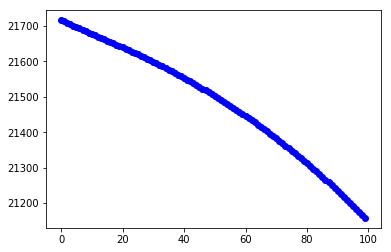

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt


def evaluate(model, x, y):
    predicted = model.predict(x)[:, 0]
    error = np.absolute(predicted - y)
    mae = sum(error) / len(error)
    return {'predicted':predicted, 'mae':mae}

print('MAE ', evaluate(model, X_test, Y_test)['mae'])

loss = history.history['loss']
plt.plot(range(EPOCHS), loss, 'bo')

if input('save:[y/n] ') == 'y':
    file_name = input('name: ')
    model.save(file_name+'.h5py')